In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics



* This NoteBook is used to predict the severity of the crashes as part of IBM Capstone Project
* This is the Initial Analysis of the project

# Business Problem
Seattle being one of the most Busy cities in USA is reporting numerous crashes every year , here we use some sample Data from the Seattle Government and try to identify the severity of the crash using Machine Learning methods.The main goal here is to classify the severity of the crash based on the fatality and certain features in Dataset.<br>
I am going to use the same dataset provided by the courseera<br>
Every year many people loose valuable lives because of crashes happening , if we analyse the data and create awareness among the people many collisions can be prevented. This is  a small work on the dataset <br>
As the Dataset is imbalnced and lot of feature knowledge is not known the accuracy is very low.

In [2]:
df=pd.read_csv('Data-Collisions.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df.shape

(194673, 38)

In [5]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [7]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [9]:
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

In [10]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

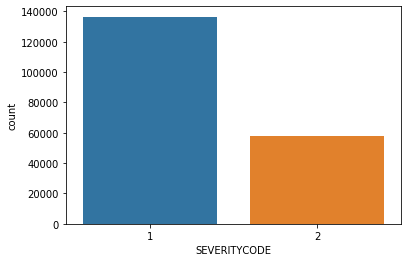

In [11]:
sns.countplot(x='SEVERITYCODE',data=df) # This clearly shows the Data is imbalanced.

In [12]:
df.SEVERITYDESC.unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [13]:
from sklearn.utils import resample

In [14]:
majordf=df[df['SEVERITYCODE']==1]
minordf=df[df['SEVERITYCODE']==2]

In [15]:
majordfsam=resample(majordf,replace=False,n_samples=58188,random_state=123)

In [16]:
majordfsam.shape

(58188, 38)

In [17]:
minordf.shape

(58188, 38)

In [18]:
balanced_df=pd.concat([majordfsam,minordf])

In [19]:
balanced_df.shape

(116376, 38)

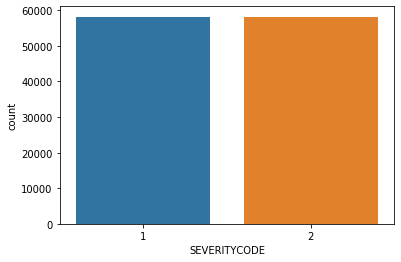

In [20]:
sns.countplot(x='SEVERITYCODE',data=balanced_df) # The data seems balanced now.

In [21]:
balanced_df['UNDERINFL'].value_counts()

N    60232
0    47463
Y     3340
1     2648
Name: UNDERINFL, dtype: int64

In [22]:
#Encoding Under the influence (0 = No, 1 = Yes)
balanced_df["UNDERINFL"].replace("N", 0, inplace=True)
balanced_df["UNDERINFL"].replace("Y", 1, inplace=True)

In [23]:
balanced_df['UNDERINFL'].value_counts()

0    60232
0    47463
1     3340
1     2648
Name: UNDERINFL, dtype: int64

In [24]:
#Encoding Speeding(0 = No, 1 = Yes)
balanced_df["SPEEDING"].replace("Y", 1, inplace=True)
balanced_df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [25]:
balanced_df['SPEEDING'].value_counts()

0.0    110396
1.0      5980
Name: SPEEDING, dtype: int64

In [26]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
balanced_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
balanced_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
balanced_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
balanced_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
balanced_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
balanced_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
balanced_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
balanced_df["LIGHTCOND"].replace("Other",3, inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
balanced_df["WEATHER"].replace("Clear", 0, inplace=True)
balanced_df["WEATHER"].replace("Raining", 3, inplace=True)
balanced_df["WEATHER"].replace("Overcast", 1, inplace=True)
balanced_df["WEATHER"].replace("Other", "Unknown", inplace=True)
balanced_df["WEATHER"].replace("Snowing", 3, inplace=True)
balanced_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
balanced_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
balanced_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
balanced_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
balanced_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
balanced_df["ROADCOND"].replace("Dry", 0, inplace=True)
balanced_df["ROADCOND"].replace("Wet", 2, inplace=True)
balanced_df["ROADCOND"].replace("Ice", 2, inplace=True)
balanced_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
balanced_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
balanced_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
balanced_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
balanced_df["ROADCOND"].replace("Oil", 2, inplace=True)

In [27]:
balanced_df.isna().sum()

SEVERITYCODE           0
X                   2914
Y                   2914
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE             922
INTKEY             72626
LOCATION            1305
EXCEPTRSNCODE      64773
EXCEPTRSNDESC     113711
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       2710
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        2937
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND     97717
UNDERINFL           2693
WEATHER             2816
ROADCOND            2764
LIGHTCOND           2848
PEDROWNOTGRNT     111981
SDOTCOLNUM         48074
SPEEDING               0
ST_COLCODE            15
ST_COLDESC          2710
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [28]:
df4=balanced_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=df4.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()


In [29]:
feature_stats

,X,Y,INCKEY,SPEEDING,SEVERITYCODE
count,18245.000000,18245.000000,18245.000000,18245.000000,18245.000000
mean,-122.331653,47.621266,160935.565306,0.024664,1.559002
std,0.029573,0.056598,87545.253596,0.155104,0.496520
min,-122.418973,47.497141,1047.000000,0.000000,1.000000
25%,-122.349529,47.576074,86848.000000,0.000000,1.000000
50%,-122.331798,47.617405,158516.000000,0.000000,2.000000
75%,-122.312687,47.665019,225121.000000,0.000000,2.000000
max,-122.238949,47.734139,330529.000000,1.000000,2.000000


In [30]:
df4.dtypes

X                 float64
Y                 float64
INCKEY              int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING          float64
SEVERITYCODE        int64
dtype: object

In [31]:
df4.replace(to_replace={'Unknown': np.nan, 
                        'Other':np.nan}, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
df4.dropna(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df4.dtypes

X                 float64
Y                 float64
INCKEY              int64
INATTENTIONIND     object
UNDERINFL          object
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
SEVERITYCODE        int64
dtype: object

In [34]:
df4['INATTENTIONIND'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [35]:
df4.dtypes

X                 float64
Y                 float64
INCKEY              int64
INATTENTIONIND      int64
UNDERINFL          object
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
SEVERITYCODE        int64
dtype: object

In [36]:
df4.UNDERINFL.unique()

array(['0', 0, 1, '1'], dtype=object)

In [37]:
df4['UNDERINFL'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)

In [38]:
df4.dtypes

X                 float64
Y                 float64
INCKEY              int64
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER           float64
ROADCOND          float64
LIGHTCOND         float64
SPEEDING          float64
SEVERITYCODE        int64
dtype: object

In [39]:
df4.drop(['X','Y'],axis=1)

,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
10240,25750,1,0,0.0,0.0,1.0,0.0,1
49555,69702,1,0,1.0,0.0,0.0,0.0,1
97883,123892,1,0,0.0,0.0,0.0,0.0,1
4657,20818,1,0,1.0,0.0,0.0,0.0,1
167435,243679,1,0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
194579,308881,1,0,3.0,2.0,0.0,0.0,2
194589,310917,1,0,0.0,0.0,1.0,0.0,2
194602,308156,1,0,3.0,2.0,0.0,0.0,2
194647,308575,1,0,3.0,2.0,1.0,0.0,2


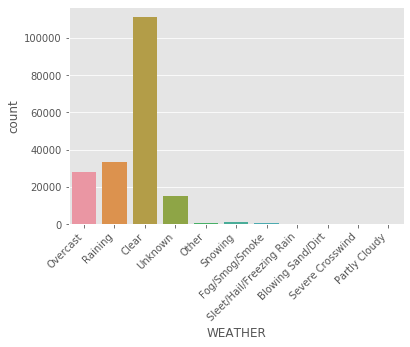

In [43]:
plt.style.use('ggplot')
ax = sns.countplot(df['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

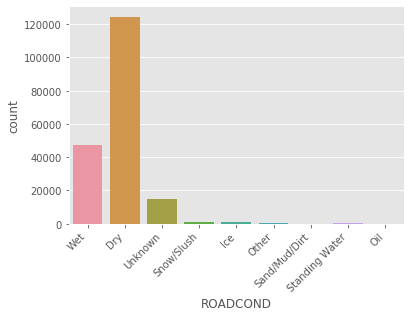

In [45]:
ax = sns.countplot(df['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [60]:
x = df4.drop('SEVERITYCODE', axis=1)
y = df4['SEVERITYCODE']
X = StandardScaler().fit(x).transform(x)
y = y.astype(int)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
ypred=lr.predict(x_test)


In [64]:
ypred.shape

(3543,)

In [66]:
y_test.shape

(3543,)

In [68]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(x_train, y_train)
print(tree_model)
yhat1 = tree_model.predict(x_test)
print('The accuracy of the decision tree classifier is {} with a max_depth of 5'.format(accuracy_score(y_test, yhat1)))

DecisionTreeClassifier(criterion='entropy', max_depth=5)
The accuracy of the decision tree classifier is 0.5664690939881456 with a max_depth of 5
